In [121]:
import pandas as pd
import math
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
data = pd.read_csv("mem_usage.csv")

In [122]:
time = data["Time"]
load = data["Load"]
mach_mem = data["Mach mem usage"]
kafka_mem = data["Kafka mem usage"]

In [123]:
# convert mem usage to megabytes

def bytes_to_megabytes(lst):
    for i in range(0, len(lst)):
        lst.at[i] = lst[i] / 1_000_000

bytes_to_megabytes(mach_mem)
bytes_to_megabytes(kafka_mem)

In [124]:
data

,Time,Load,Mach mem usage,Kafka mem usage
0,0,200000,0.000000,0.434287
1,1,200000,0.000000,0.512973
2,2,200000,0.000000,0.512973
3,3,200000,0.000000,0.512973
4,4,200000,0.000000,0.582227
...,...,...,...,...
1001,1001,200000,0.256641,11.628713
1002,1002,200000,0.000000,8.953536
1003,1003,200000,0.000000,7.010331
1004,1004,200000,0.000000,5.233352


In [125]:
max_mem_usage = max(max(mach_mem), max(kafka_mem))

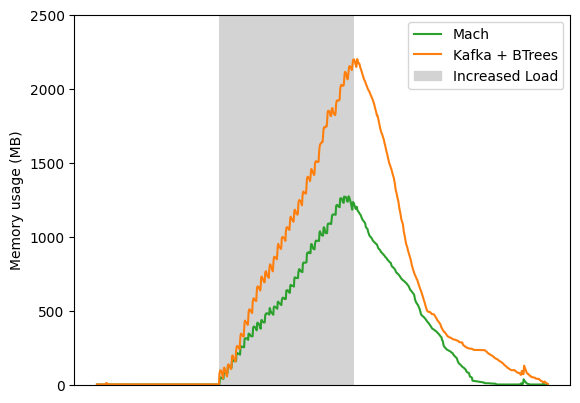

In [134]:
fig, ax = plt.subplots()
ax.set_xticks([])
ax.set_yticks([0, 500, 1000, 1500, 2000, 2500])
plt.ylim([0, 2500])
ax.set_ylabel("Memory usage (MB)")

spike_begin = load.loc[load.eq(max(load))].index[0]
spike_end = spike_begin + 300

ax.plot(time, mach_mem, label="Mach", color="tab:green")
ax.plot(time, kafka_mem, label="Kafka + BTrees", color="tab:orange")
ax.axvspan(spike_begin, spike_end, facecolor="lightgrey")


handles, labels = ax.get_legend_handles_labels()
labels.append("Increased Load")
handles.append(mpatches.Patch(color="lightgrey"))
ax.legend(handles, labels)


plt.show()